### Сравнение различных метрик зависиомсти

Давайте посмотрим, как различные метрики справляются с поиском зависимости для различных совместных распределений. Код ниже представляет собой доработанную версию с http://minepy.sourceforge.net/docs/1.0.0/python.html

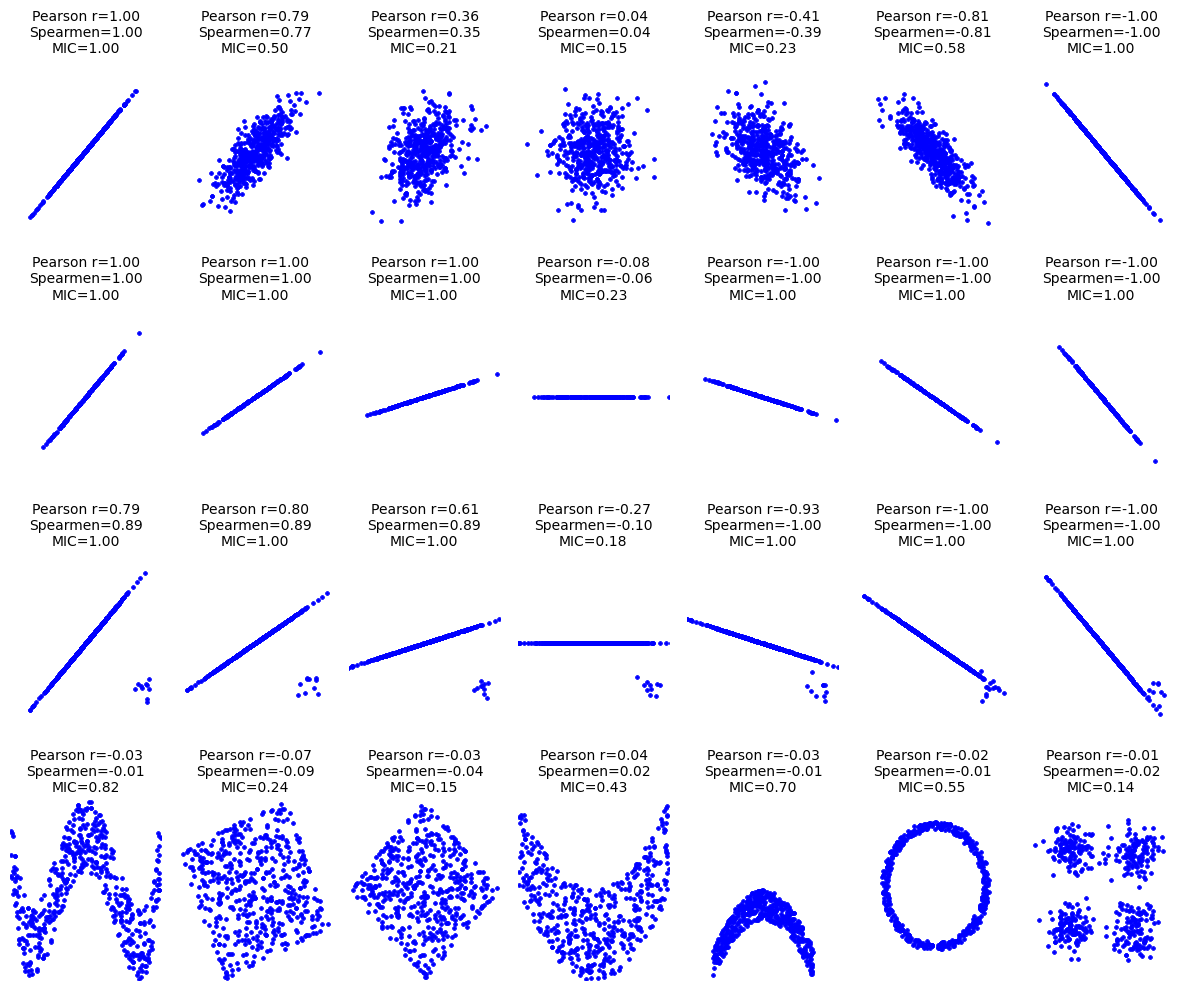

In [34]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
from minepy import MINE
from scipy import stats
%matplotlib inline

def mysubplot(x, y, numRows, numCols, plotNum,
              xlim=(-4, 4), ylim=(-4, 4)):

    r = np.around(np.corrcoef(x, y)[0, 1], 2)
    rho = np.around(stats.spearmanr(x,y)[0], 2)
    mine = MINE(alpha=0.6, c=15)
    mine.compute_score(x, y)
    mic = np.around(mine.mic(), 3)
    ax = plt.subplot(numRows, numCols, plotNum,
                     xlim=xlim, ylim=ylim)
    ax.set_title('Pearson r=%.2f\nSpearmen=%.2f\nMIC=%.2f' % (r, rho, mic),fontsize=10)
    ax.set_frame_on(False)
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    ax.plot(x, y, '.')
    ax.set_xticks([])
    ax.set_yticks([])
    return ax

def rotation(xy, t):
    return np.dot(xy, [[np.cos(t), -np.sin(t)],
                       [np.sin(t), np.cos(t)]])

def mvnormal(n=500):
    cors = [1.0, 0.8, 0.4, 0.0, -0.4, -0.8, -1.0]
    for i, cor in enumerate(cors):
        cov = [[1, cor],[cor, 1]]
        xy = np.random.multivariate_normal([0, 0], cov, n)
        mysubplot(xy[:, 0], xy[:, 1], 4, 7, i+1)
             

def rotnormal(n=500):
    ts = [0, np.pi/12, np.pi/6, np.pi/4, np.pi/2-np.pi/6,
          np.pi/2-np.pi/12, np.pi/2]
    cov = [[1, 1],[1, 1]]
    xy = np.random.multivariate_normal([0, 0], cov, n)
    for i, t in enumerate(ts):
        xy_r = np.around(rotation(xy, t), 3)
        xy_r[:,1] += np.random.normal(0,0.001, n)
        mysubplot(xy_r[:, 0], xy_r[:, 1], 4, 7, i+8)

def contaminate(n=500):
    ts = [0, np.pi/12, np.pi/6, np.pi/4, np.pi/2-np.pi/6,
          np.pi/2-np.pi/12, np.pi/2]
    cov = [[1, 1],[1, 1]]
    cov_cont = [[0.1, 0],[0, 0.1]]
    xy = np.random.multivariate_normal([0, 0], cov, n)
    for i, t in enumerate(ts):
        xy_r = np.around(rotation(xy, t), 3)
        xy_r[:,1] += np.random.normal(0,0.001, n)
        contamination = np.random.multivariate_normal([3, -2], cov_cont, 10)
        xy_r = np.vstack((xy_r, contamination))
        mysubplot(xy_r[:, 0], xy_r[:, 1], 4, 7, i+15)
        
def others(n=500):
    x = np.random.uniform(-1, 1, n)
    y = 4*(x**2-0.5)**2 + np.random.uniform(-1, 1, n)/3
    mysubplot(x, y, 4, 7, 22, (-1, 1), (-1/3, 1+1/3))
    
    y = np.random.uniform(-1, 1, n)
    xy = np.concatenate((x.reshape(-1, 1), y.reshape(-1, 1)), axis=1)
    xy = rotation(xy, -np.pi/8)
    lim = np.sqrt(2+np.sqrt(2)) / np.sqrt(2)
    mysubplot(xy[:, 0], xy[:, 1], 4, 7, 23, (-lim, lim), (-lim, lim))

    xy = rotation(xy, -np.pi/8)
    lim = np.sqrt(2)
    mysubplot(xy[:, 0], xy[:, 1], 4, 7, 24, (-lim, lim), (-lim, lim))
    
    y = 2*x**2 + np.random.uniform(-1, 1, n)
    mysubplot(x, y, 4, 7, 25, (-1, 1), (-1, 3))
    
    y = (x**2 + np.random.uniform(0, 0.5, n)) * \
        np.array([-1, 1])[np.random.randint(0, 1, size=n)]
    mysubplot(x, y, 4, 7, 26, (-1.5, 1.5), (-1.5, 1.5))

    y = np.cos(x * np.pi) + np.random.uniform(0, 1/8, n)
    x = np.sin(x * np.pi) + np.random.uniform(0, 1/8, n)
    mysubplot(x, y, 4, 7, 27, (-1.5, 1.5), (-1.5, 1.5))

    xy1 = np.random.multivariate_normal([3, 3], [[1, 0], [0, 1]], int(n/4))
    xy2 = np.random.multivariate_normal([-3, 3], [[1, 0], [0, 1]], int(n/4))
    xy3 = np.random.multivariate_normal([-3, -3], [[1, 0], [0, 1]], int(n/4))
    xy4 = np.random.multivariate_normal([3, -3], [[1, 0], [0, 1]], int(n/4))
    xy = np.concatenate((xy1, xy2, xy3, xy4), axis=0)
    mysubplot(xy[:, 0], xy[:, 1], 4, 7, 28, (-7, 7), (-7, 7))

plt.figure(facecolor='white', figsize=(12, 10))
mvnormal(n=500)
rotnormal(n=200)
contaminate(n=500)
others(n=500)
plt.tight_layout()
plt.show()